In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import collections

In [2]:
df = pd.read_csv('MO_State_Park_Bison_Locations.csv')

In [3]:
df[['Lat', 'Long']] = df.LatLon.str.split(" ", expand=True,)

In [4]:
df = df.drop(['LatLon'], axis=1)

In [5]:
lst = df.values.tolist()

In [6]:
for i in lst:
    i[6] = i[6][1:-1]
    i[-1] = i[-1][:-1]

In [7]:
df = pd.DataFrame(lst, columns = ['RecordID', 'GPSFixUnixTimeCST', 'ESN', 'Name', 'GPSFixDateTime', 'Moving', 'Lat', 'Long'])

In [8]:
df['Lat'] = df.Lat.apply(pd.to_numeric)
df['Long'] = df.Long.apply(pd.to_numeric)

In [9]:
df.head()

,RecordID,GPSFixUnixTimeCST,ESN,Name,GPSFixDateTime,Moving,Lat,Long
0,921992-1411305776,1411304479,921992,Miller Bison 1,9/21/2014 8:01,Y,37.532655,-94.568961
1,921992-1411316536,1411315239,921992,Miller Bison 1,9/21/2014 11:00,Y,37.534715,-94.561622
2,921992-1411320662,1411320640,921992,Miller Bison 1,9/21/2014 12:30,N,37.534736,-94.561622
3,921816-1411320663,1411320641,921816,Miller Bison 2,9/21/2014 12:30,N,37.534715,-94.561751
4,921992-1411326565,1411326040,921992,Miller Bison 1,9/21/2014 14:00,Y,37.534329,-94.554648


In [10]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))

In [11]:
gdf.head()

,RecordID,GPSFixUnixTimeCST,ESN,Name,GPSFixDateTime,Moving,Lat,Long,geometry
0,921992-1411305776,1411304479,921992,Miller Bison 1,9/21/2014 8:01,Y,37.532655,-94.568961,POINT (-94.56896 37.53265)
1,921992-1411316536,1411315239,921992,Miller Bison 1,9/21/2014 11:00,Y,37.534715,-94.561622,POINT (-94.56162 37.53472)
2,921992-1411320662,1411320640,921992,Miller Bison 1,9/21/2014 12:30,N,37.534736,-94.561622,POINT (-94.56162 37.53474)
3,921816-1411320663,1411320641,921816,Miller Bison 2,9/21/2014 12:30,N,37.534715,-94.561751,POINT (-94.56175 37.53472)
4,921992-1411326565,1411326040,921992,Miller Bison 1,9/21/2014 14:00,Y,37.534329,-94.554648,POINT (-94.55465 37.53433)


In [12]:
usa = gpd.read_file('/home/datascience/state_21basic/states.shp')

In [13]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<AxesSubplot:>

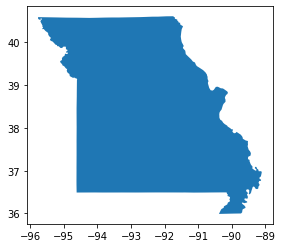

In [14]:
usa[usa.STATE_ABBR == 'MO'].plot()

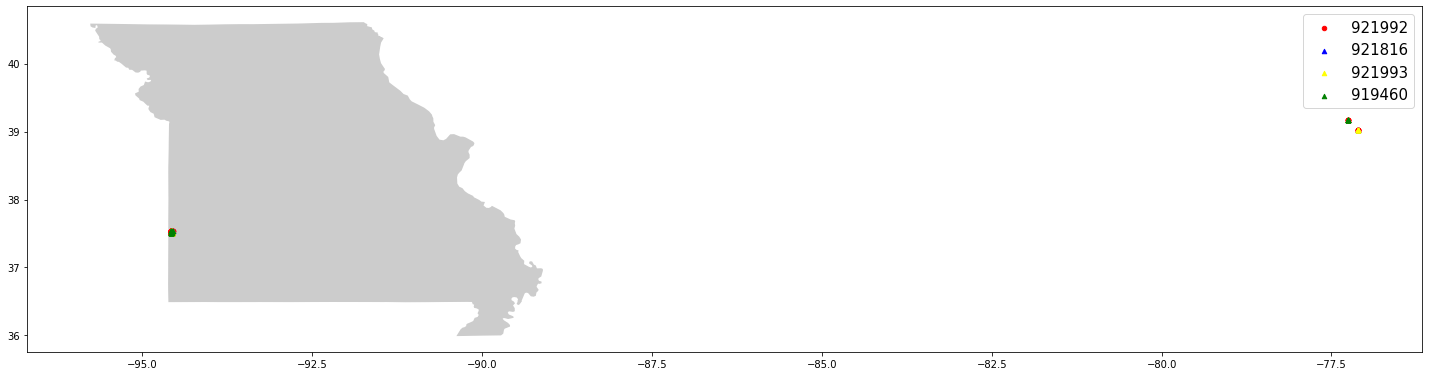

In [15]:
fig, ax = plt.subplots(figsize=(25, 25))
usa[usa.STATE_ABBR == 'MO'].plot(ax = ax, alpha = 0.4, color = 'grey')
gdf[gdf['ESN']==921992].plot(ax = ax, markersize = 20, color = 'red', marker='o', label='921992')
gdf[gdf['ESN']==921816].plot(ax = ax, markersize = 20, color = 'blue', marker='^', label='921816')
gdf[gdf['ESN']==921993].plot(ax = ax, markersize = 20, color = 'yellow', marker='^', label='921993')
gdf[gdf['ESN']==919460].plot(ax = ax, markersize = 20, color = 'green', marker='^', label='919460')
plt.legend(prop={'size':15})

<AxesSubplot:>

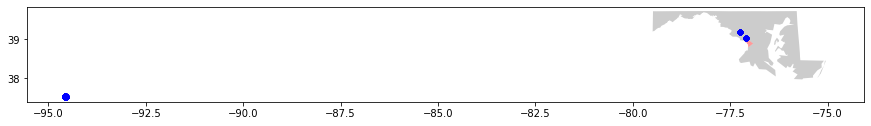

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'MD'].plot(ax = ax, alpha = 0.4, color = 'grey')
usa[usa.STATE_ABBR == 'DC'].plot(ax = ax, alpha = 0.4, color = 'RED')
gdf.plot(ax = ax, markersize = 20, color = 'blue', marker='o')

In [17]:
df_2 = pd.read_csv('bison-Bison-SouthDakota.csv')

In [18]:
df_2.columns

Index(['bisonID', 'basisOfRecord', 'catalogNumber', 'collectorNumber',
       'recordedBy', 'providerID', 'institutionCode', 'resourceID',
       'ownerInstitutionCollectionCode', 'eventDate', 'year',
       'verbatimEventDate', 'providedScientificName', 'scientificName',
       'ITISscientificName', 'providedCommonName', 'ITIScommonName', 'ITIStsn',
       'validAcceptedITIStsn', 'providedTSN', 'decimalLatitude',
       'decimalLongitude', 'geodeticDatum', 'coordinatePrecision',
       'coordinateUncertaintyInMeters', 'verbatimElevation', 'verbatimDepth',
       'centroid', 'higherGeographyID', 'computedCountyFips', 'providedCounty',
       'calculatedCounty', 'providedState', 'calculatedState', 'mrgid',
       'calculated_waterbody', 'establishmentMeans', 'countryCode',
       'institutionID', 'collectionID', 'relatedResourceID', 'associatedMedia',
       'associatedReferences', 'generalComments', 'license'],
      dtype='object')

In [19]:
df_SD_location = df_2[['bisonID','eventDate', 'year', 'decimalLatitude', 'decimalLongitude']]

In [20]:
gdf_SD = gpd.GeoDataFrame(df_SD_location, geometry=gpd.points_from_xy(df_SD_location.decimalLongitude, df_SD_location.decimalLatitude))

In [21]:
gdf_SD.geometry

0       POINT (-102.87574 43.62527)
1       POINT (-102.87574 43.62527)
2       POINT (-102.87574 43.62527)
3       POINT (-102.87574 43.62527)
4       POINT (-102.87574 43.62527)
                   ...             
1971    POINT (-102.87574 43.62527)
1972    POINT (-102.87574 43.62527)
1973    POINT (-102.87574 43.62527)
1974    POINT (-102.87574 43.62527)
1975                POINT (nan nan)
Name: geometry, Length: 1976, dtype: geometry

In [22]:
bison_lst_SD = []
for i in gdf_SD.geometry:
    bison_lst_SD.append(i)

for j in bison_lst_SD:
    print(j)

POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-103.4148712158203 43.58108901977539)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-103.4148712158203 43.58108901977539)
POINT (-102.8757400512695 43.62527084350586)
POINT (-102.8757400512695 43.62527084350586)
POINT (-10

<AxesSubplot:>

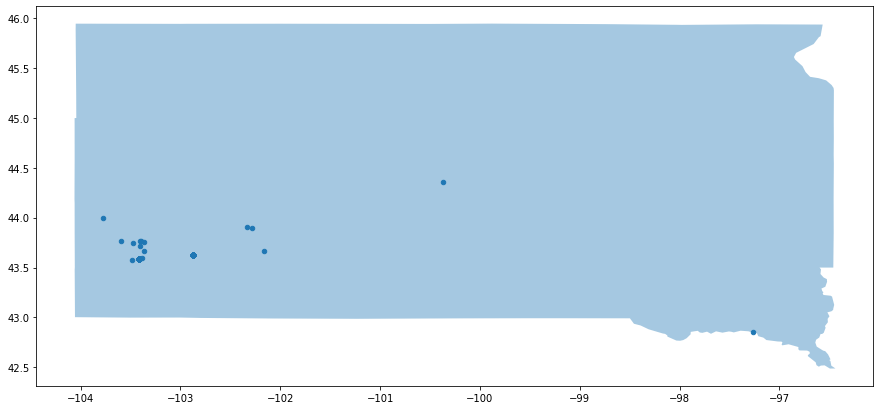

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'SD'].plot(ax = ax, alpha = 0.4)
gdf_SD.plot(ax = ax, markersize = 20, marker='o')

In [24]:
df_weather_SD = pd.read_csv('ggweather_SD.csv')

In [25]:
df_weather_SD.head()

,Unnamed: 0,Location,State,ID,Latitude,Longitude,Elevation,Jan_max,Feb_max,Mar_max,...,Mar_Snow,Apr_Snow,May_Snow,Jun_Snow,Jul_Snow,Aug_Snow,Sep_Snow,Oct_Snow,Nov_Snow,Dec_Snow
0,0,ABERDEEN,SD,USW00014929,45.4558,-98.4131,396.8,23.7,28.6,41.7,...,6.3,4.2,0.0,0.0,0.0,0.0,0.0,1.3,6.5,8.0
1,1,ABERDEEN 1.0 NNE,SD,US1SDBR0001,45.4810,-98.4732,395.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,ABERDEEN 1.5 SSW,SD,US1SDBR0011,45.4468,-98.4909,396.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,ABERDEEN 1.5 SW,SD,US1SDBR0038,45.4505,-98.5086,398.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ABERDEEN 3 E,SD,USC00390022,45.4553,-98.4142,396.5,20.7,25.2,38.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_weather_SD.columns

Index(['Unnamed: 0', 'Location', 'State', 'ID', 'Latitude', 'Longitude',
       'Elevation', 'Jan_max', 'Feb_max', 'Mar_max', 'Apr_max', 'May_max',
       'Jun_max', 'Jul_max', 'Aug_max', 'Sep_max', 'Oct_max', 'Nov_max',
       'Dec_max', 'Jan_min', 'Feb_min', 'Mar_min', 'Apr_min', 'May_min',
       'Jun_min', 'Jul_min', 'Aug_min', 'Sep_min', 'Oct_min', 'Nov_min',
       'Dec_min', 'Jan_Prec', 'Feb_Prec', 'Mar_Prec', 'Apr_Prec', 'May_Prec',
       'Jun_Prec', 'Jul_Prec', 'Aug_Prec', 'Sep_Prec', 'Oct_Prec', 'Nov_Prec',
       'Dec_Prec', 'Jan_Snow', 'Feb_Snow', 'Mar_Snow', 'Apr_Snow', 'May_Snow',
       'Jun_Snow', 'Jul_Snow', 'Aug_Snow', 'Sep_Snow', 'Oct_Snow', 'Nov_Snow',
       'Dec_Snow'],
      dtype='object')

In [27]:
gdf_weather_SD = gpd.GeoDataFrame(df_weather_SD, geometry=gpd.points_from_xy(df_weather_SD.Longitude, df_weather_SD.Latitude))

In [28]:
gdf_weather_SD.geometry

0       POINT (-98.41310 45.45580)
1       POINT (-98.47320 45.48100)
2       POINT (-98.49090 45.44680)
3       POINT (-98.50860 45.45050)
4       POINT (-98.41420 45.45530)
                  ...             
272     POINT (-99.84030 43.36860)
273     POINT (-99.84220 43.39060)
274    POINT (-100.48140 43.49890)
275     POINT (-97.36330 42.87830)
276    POINT (-102.99560 45.06690)
Name: geometry, Length: 277, dtype: geometry

In [29]:
weather_lst_SD = []
for i in gdf_weather_SD.geometry:
    weather_lst_SD.append(i)

for j in weather_lst_SD:
    print(j)

POINT (-98.4131 45.4558)
POINT (-98.47320000000001 45.481)
POINT (-98.4909 45.4468)
POINT (-98.5086 45.4505)
POINT (-98.41419999999999 45.4553)
POINT (-99.1297 45.7114)
POINT (-99.0628 43.4894)
POINT (-97.79810000000001 43.6514)
POINT (-97.9067 45.4133)
POINT (-103.3292 45.5317)
POINT (-103.66 43.03)
POINT (-97.1703 44.3631)
POINT (-98.3486 43.3131)
POINT (-99.7983 45.8811)
POINT (-98.51139999999999 44.9633)
POINT (-96.5227 44.5309)
POINT (-96.53189999999999 44.5044)
POINT (-98.30719999999999 45.4739)
POINT (-104.035 44.4989)
POINT (-103.8511 44.6714)
POINT (-103.9339 44.9906)
POINT (-96.4997 45.2994)
POINT (-102.465 45.5286)
POINT (-102.3166 45.2483)
POINT (-102.8768 45.324)
POINT (-99.9881 44.5128)
POINT (-98.9508 43.0778)
POINT (-99.65170000000001 45.4511)
POINT (-103.0345 44.2318)
POINT (-97.5017 43.5525)
POINT (-97.7539 45.2386)
POINT (-97.74890000000001 45.7886)
POINT (-97.9331 45.9217)
POINT (-96.7878 44.3039)
POINT (-96.7855 44.2918)
POINT (-96.76860000000001 44.325)
POINT (-96

<AxesSubplot:>

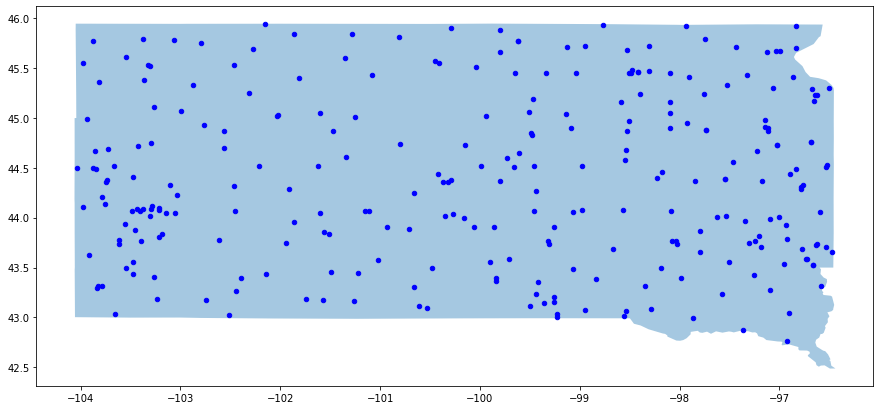

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'SD'].plot(ax = ax, alpha = 0.4)
gdf_weather_SD.plot(ax = ax, markersize = 20, color = 'blue', marker='o')

In [31]:
# weather_lst_SD
lst_point = []
for i in bison_lst_SD:
    nearst = 50000
    for row_index, j in enumerate(weather_lst_SD):
        distance = np.sqrt((j.x - i.x)**2 + (j.y - i.y)**2)
        if distance < nearst:
            nearst = distance
            near_point = row_index

    lst_point.append(near_point)

In [32]:
collections.Counter(lst_point)

Counter({258: 1414,
         270: 549,
         257: 2,
         275: 1,
         64: 6,
         89: 1,
         142: 1,
         63: 1,
         228: 1})

In [33]:
# use 270 and 258 
new_df = gdf_weather_SD.iloc[[258, 270],:]

<AxesSubplot:>

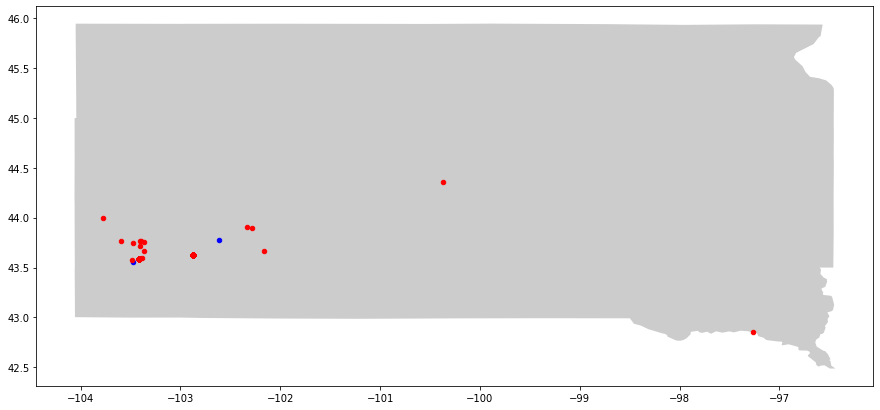

In [34]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'SD'].plot(ax = ax, alpha = 0.4, color = 'gray')
new_df.plot(ax = ax, markersize = 20, color = 'blue', marker='o')
gdf_SD.plot(ax = ax, markersize = 20, color = 'red', marker='o')

In [35]:
new_df

,Unnamed: 0,Location,State,ID,Latitude,Longitude,Elevation,Jan_max,Feb_max,Mar_max,...,Apr_Snow,May_Snow,Jun_Snow,Jul_Snow,Aug_Snow,Sep_Snow,Oct_Snow,Nov_Snow,Dec_Snow,geometry
258,258,WASTA 21.6 SSW,SD,US1SDPN0019,43.7810,-102.6168,894.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-102.61680 43.78100)
270,270,WIND CAVE,SD,USC00399347,43.5561,-103.4794,1266.4,39.7,40.7,50.0,...,7.8,0.9,0.0,0.0,0.0,0.2,2.1,4.4,7.5,POINT (-103.47940 43.55610)


In [36]:
gdf_weather_SD.columns

Index(['Unnamed: 0', 'Location', 'State', 'ID', 'Latitude', 'Longitude',
       'Elevation', 'Jan_max', 'Feb_max', 'Mar_max', 'Apr_max', 'May_max',
       'Jun_max', 'Jul_max', 'Aug_max', 'Sep_max', 'Oct_max', 'Nov_max',
       'Dec_max', 'Jan_min', 'Feb_min', 'Mar_min', 'Apr_min', 'May_min',
       'Jun_min', 'Jul_min', 'Aug_min', 'Sep_min', 'Oct_min', 'Nov_min',
       'Dec_min', 'Jan_Prec', 'Feb_Prec', 'Mar_Prec', 'Apr_Prec', 'May_Prec',
       'Jun_Prec', 'Jul_Prec', 'Aug_Prec', 'Sep_Prec', 'Oct_Prec', 'Nov_Prec',
       'Dec_Prec', 'Jan_Snow', 'Feb_Snow', 'Mar_Snow', 'Apr_Snow', 'May_Snow',
       'Jun_Snow', 'Jul_Snow', 'Aug_Snow', 'Sep_Snow', 'Oct_Snow', 'Nov_Snow',
       'Dec_Snow', 'geometry'],
      dtype='object')

In [37]:
df_elevation = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Elevation == 0].index)
df_elevation[['Elevation']].describe()

,Elevation
count,277.000000
mean,672.781227
std,299.069066
min,333.800000
25%,474.000000
50%,557.800000
75%,806.200000
max,2100.100000


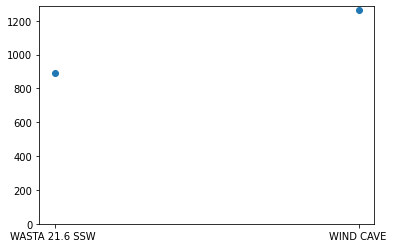

In [38]:
plt.scatter(new_df.Location, new_df.Elevation)
plt.ylim(ymin=0)
plt.show()

In [39]:
df_max = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Aug_max == 0].index)
df_max[['Jan_max', 'Feb_max', 'Mar_max', 'Apr_max', 'May_max',
       'Jun_max', 'Jul_max', 'Aug_max', 'Sep_max', 'Oct_max', 'Nov_max',
       'Dec_max']].describe()

,Jan_max,Feb_max,Mar_max,Apr_max,May_max,Jun_max,Jul_max,Aug_max,Sep_max,Oct_max,Nov_max,Dec_max
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,28.983234,32.864072,44.588024,56.836527,68.120958,78.421557,85.264072,83.783832,75.334731,59.814970,44.410778,32.271856
std,5.591610,4.727365,3.918058,2.463281,2.362912,2.263676,2.722601,2.954786,2.596915,2.419863,2.936907,4.123893
min,19.500000,23.900000,36.700000,50.100000,59.600000,70.700000,78.500000,77.500000,69.000000,54.100000,38.500000,25.300000
25%,24.050000,28.850000,41.700000,55.000000,67.000000,77.200000,83.200000,81.400000,73.350000,58.000000,42.100000,28.650000
50%,29.000000,33.000000,44.900000,57.000000,68.300000,78.600000,85.700000,84.000000,75.600000,59.800000,44.400000,32.400000
75%,33.550000,36.900000,47.350000,58.450000,69.450000,79.950000,87.300000,85.950000,77.400000,61.650000,46.800000,35.450000
max,40.500000,43.300000,54.100000,62.300000,73.000000,82.900000,91.200000,90.500000,81.800000,65.400000,50.500000,40.700000


<Figure size 1080x1080 with 0 Axes>

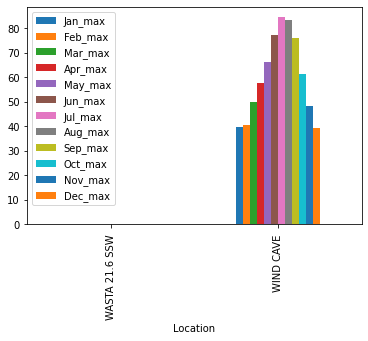

In [40]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_max', 'Feb_max', 'Mar_max', 'Apr_max', 'May_max',
       'Jun_max', 'Jul_max', 'Aug_max', 'Sep_max', 'Oct_max', 'Nov_max',
       'Dec_max'], kind="bar")
plt.show()

In [41]:
df_min = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Aug_min == 0].index)
df_min[['Jan_min', 'Feb_min', 'Mar_min', 'Apr_min', 'May_min',
       'Jun_min', 'Jul_min', 'Aug_min', 'Sep_min', 'Oct_min', 'Nov_min',
       'Dec_min']].describe()

,Jan_min,Feb_min,Mar_min,Apr_min,May_min,Jun_min,Jul_min,Aug_min,Sep_min,Oct_min,Nov_min,Dec_min
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7.802994,10.848503,21.276048,31.773054,43.586228,54.122754,59.579641,57.257485,47.750299,34.471257,21.813174,11.800599
std,4.054826,3.335386,2.365190,2.146907,2.670497,3.133432,2.752404,2.827499,2.957691,2.589369,2.370795,2.794217
min,0.400000,4.100000,11.600000,21.300000,30.600000,38.700000,43.700000,40.300000,31.500000,21.400000,12.000000,5.400000
25%,4.550000,8.250000,19.400000,30.750000,41.950000,52.600000,58.300000,56.050000,46.300000,33.250000,20.600000,9.700000
50%,7.700000,11.000000,21.500000,31.800000,44.000000,54.600000,59.900000,57.500000,48.100000,34.700000,21.900000,11.600000
75%,10.600000,13.400000,22.800000,33.000000,45.100000,56.100000,61.250000,59.000000,49.600000,36.100000,23.250000,13.800000
max,18.800000,18.400000,26.400000,36.500000,48.700000,59.500000,65.300000,62.300000,53.000000,39.500000,27.000000,19.800000


<Figure size 1080x1080 with 0 Axes>

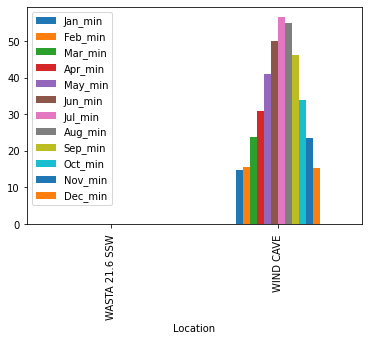

In [42]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_min', 'Feb_min', 'Mar_min', 'Apr_min', 'May_min',
       'Jun_min', 'Jul_min', 'Aug_min', 'Sep_min', 'Oct_min', 'Nov_min',
       'Dec_min'], kind="bar")
plt.show()

In [43]:
df_prec = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.May_Prec == 0].index)
df_prec[['Jan_Prec', 'Feb_Prec', 'Mar_Prec', 'Apr_Prec', 'May_Prec',
       'Jun_Prec', 'Jul_Prec', 'Aug_Prec', 'Sep_Prec', 'Oct_Prec', 'Nov_Prec',
       'Dec_Prec']].describe()

,Jan_Prec,Feb_Prec,Mar_Prec,Apr_Prec,May_Prec,Jun_Prec,Jul_Prec,Aug_Prec,Sep_Prec,Oct_Prec,Nov_Prec,Dec_Prec
count,263.000000,263.00000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,0.505856,0.66251,1.080684,2.283650,3.416730,3.681787,2.980646,2.493498,2.075703,1.885627,0.748745,0.614715
std,0.175669,0.18182,0.246749,0.465758,0.445253,0.495718,0.562756,0.596346,0.629988,0.339502,0.242466,0.208526
min,0.190000,0.30000,0.530000,1.280000,2.440000,2.110000,1.830000,1.130000,0.900000,1.090000,0.320000,0.240000
25%,0.410000,0.57000,0.910000,1.960000,3.125000,3.345000,2.515000,2.045000,1.505000,1.630000,0.555000,0.480000
50%,0.490000,0.65000,1.050000,2.230000,3.370000,3.680000,3.010000,2.450000,1.990000,1.870000,0.710000,0.590000
75%,0.570000,0.74000,1.235000,2.600000,3.710000,3.970000,3.380000,2.990000,2.665000,2.140000,0.895000,0.720000
max,1.770000,1.83000,2.240000,3.540000,4.900000,5.210000,6.290000,4.000000,3.270000,3.320000,1.800000,1.720000


<Figure size 1080x1080 with 0 Axes>

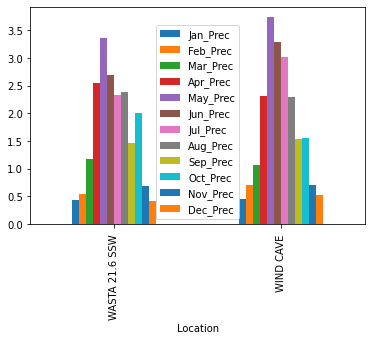

In [44]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_Prec', 'Feb_Prec', 'Mar_Prec', 'Apr_Prec', 'May_Prec',
       'Jun_Prec', 'Jul_Prec', 'Aug_Prec', 'Sep_Prec', 'Oct_Prec', 'Nov_Prec',
       'Dec_Prec'], kind="bar")
plt.show()

In [45]:
df_snow = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Jan_Snow == 0].index)
df_snow = df_snow.drop(df_snow[df_snow.Dec_Snow == 0].index)
df_snow[['Jan_Snow', 'Feb_Snow', 'Mar_Snow', 'Apr_Snow', 'May_Snow',
       'Jun_Snow', 'Jul_Snow', 'Aug_Snow', 'Sep_Snow', 'Oct_Snow', 'Nov_Snow',
       'Dec_Snow']].describe()

,Jan_Snow,Feb_Snow,Mar_Snow,Apr_Snow,May_Snow,Jun_Snow,Jul_Snow,Aug_Snow,Sep_Snow,Oct_Snow,Nov_Snow,Dec_Snow
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0,138.0,138.000000,138.000000,138.000000,138.000000
mean,6.506522,7.960145,6.852174,6.013768,0.546377,0.012319,0.0,0.0,0.059420,2.054348,5.081159,7.958696
std,2.226883,2.346905,2.678741,3.041878,1.022603,0.084104,0.0,0.0,0.220364,2.032909,2.154085,2.484660
min,2.700000,4.100000,2.800000,1.200000,0.000000,0.000000,0.0,0.0,0.000000,0.100000,1.200000,3.700000
25%,5.325000,6.700000,5.500000,4.500000,0.000000,0.000000,0.0,0.0,0.000000,1.100000,4.000000,6.600000
50%,6.200000,7.700000,6.400000,5.400000,0.100000,0.000000,0.0,0.0,0.000000,1.550000,5.000000,7.700000
75%,7.200000,8.700000,7.600000,6.900000,0.600000,0.000000,0.0,0.0,0.000000,2.475000,5.900000,8.900000
max,24.800000,26.200000,27.600000,29.000000,6.700000,0.900000,0.0,0.0,1.800000,19.300000,22.300000,25.300000


<Figure size 1080x1080 with 0 Axes>

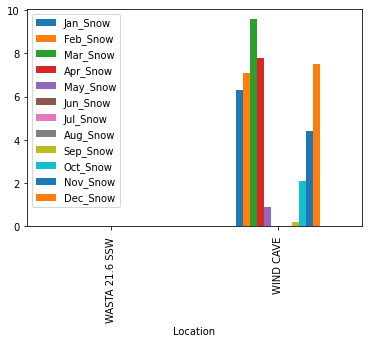

In [46]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_Snow', 'Feb_Snow', 'Mar_Snow', 'Apr_Snow', 'May_Snow',
       'Jun_Snow', 'Jul_Snow', 'Aug_Snow', 'Sep_Snow', 'Oct_Snow', 'Nov_Snow',
       'Dec_Snow'], kind="bar")
plt.show()